# Wind energy - Clustering of countries

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [5]:
path = "../../../datasets/_classified/kaggle/"

In [6]:
df_wind_on = pd.read_csv(path + "wind_generation_by_country.csv")
df_wind_on.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dealing with timestamps

In [7]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=_df.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [9]:
df_wind_on = add_time(df_wind_on)
df_wind_on.tail(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK,time,hour,month,week
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53
262967,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,12,53


In [11]:
# list(df_wind_on.columns)

In [12]:
len(df_wind_on.columns)

33

In [13]:
df_wind_on = df_wind_on.drop(columns=['time', 'hour', 'month', 'week'])

---

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
df_wind_transposed = df_wind_on[-24*365:].T
df_wind_transposed.tail(2)

,254208,254209,254210,254211,254212,254213,254214,254215,254216,254217,254218,254219,254220,254221,254222,254223,254224,254225,254226,254227,254228,254229,254230,254231,254232,254233,254234,254235,254236,254237,254238,254239,254240,254241,254242,254243,254244,254245,254246,254247,254248,254249,254250,254251,254252,254253,254254,254255,254256,254257,254258,254259,254260,254261,254262,254263,254264,254265,254266,254267,254268,254269,254270,254271,254272,254273,254274,254275,254276,254277,254278,254279,254280,254281,254282,254283,254284,254285,254286,254287,254288,254289,254290,254291,254292,254293,254294,254295,254296,254297,254298,254299,254300,254301,254302,254303,254304,254305,254306,254307,254308,254309,254310,254311,254312,254313,254314,254315,254316,254317,254318,254319,254320,254321,254322,254323,254324,254325,254326,254327,254328,254329,254330,254331,254332,254333,254334,254335,254336,254337,254338,254339,254340,254341,254342,254343,254344,254345,254346,254347,254348,254349,254350,254351,254352,254353,254354,254355,254356,254357,...,262818,262819,262820,262821,262822,262823,262824,262825,262826,262827,262828,262829,262830,262831,262832,262833,262834,262835,262836,262837,262838,262839,262840,262841,262842,262843,262844,262845,262846,262847,262848,262849,262850,262851,262852,262853,262854,262855,262856,262857,262858,262859,262860,262861,262862,262863,262864,262865,262866,262867,262868,262869,262870,262871,262872,262873,262874,262875,262876,262877,262878,262879,262880,262881,262882,262883,262884,262885,262886,262887,262888,262889,262890,262891,262892,262893,262894,262895,262896,262897,262898,262899,262900,262901,262902,262903,262904,262905,262906,262907,262908,262909,262910,262911,262912,262913,262914,262915,262916,262917,262918,262919,262920,262921,262922,262923,262924,262925,262926,262927,262928,262929,262930,262931,262932,262933,262934,262935,262936,262937,262938,262939,262940,262941,262942,262943,262944,262945,262946,262947,262948,262949,262950,262951,262952,262953,262954,262955,262956,262957,262958,262959,262960,262961,262962,262963,262964,262965,262966,262967
SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02559,0.028774,0.024368,0.029511,0.026991,0.025740,0.015349,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021616,0.035272,0.053339,0.061699,0.066683,0.028761,0.015128,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025668,0.076981,0.123490,0.127871,0.094509,0.037900,0.017013,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026893,0.120466,0.231455,0.265153,0.193312,0.072419,0.015935,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025531,0.075039,0.123906,0.138702,0.087216,0.037514,0.014901,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021719,0.025448,0.029375,0.028795,0.025825,0.018200,0.014727,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025873,0.042821,0.072591,0.080633,0.058003,0.029394,0.016086,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025720,0.024646,0.033946,0.045143,0.034991,0.023347,0.015876,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025784,0.029620,0.038149,0.038235,0.030227,0.025546,0.015927,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025471,0.035349,0.054981,0.060864,0.051826,0.034001,0.016073,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025909,0.035216,0.041221,0.039333,0.034922,0.030504,0.016031,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025530,0.039458,0.075218,0.083126,0.078889,0.051887,0.016154,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01436,0.018766,0.035738,0.042646,0.048847,0.043734,0.035139,0.017733,0.008758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
def plot_elbow_scores(df_, cluster_nb):
    km_inertias, km_scores = [], []

    for k in range(2, cluster_nb):
        km = KMeans(n_clusters=k).fit(df_)
        km_inertias.append(km.inertia_)
        km_scores.append(silhouette_score(df_, km.labels_))

    sns.lineplot(range(2, cluster_nb), km_inertias)
    plt.title('elbow graph / inertia depending on k')
    plt.show()

    sns.lineplot(range(2, cluster_nb), km_scores)
    plt.title('scores depending on k')
    plt.show()

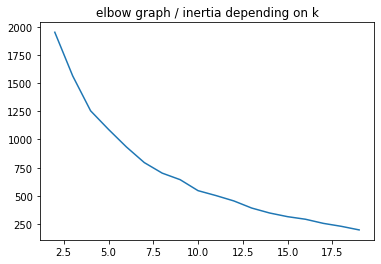

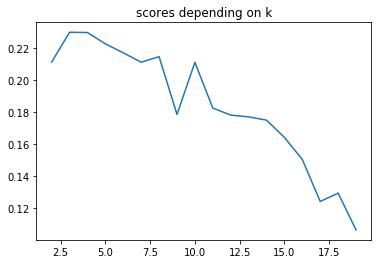

In [19]:
plot_elbow_scores(df_wind_transposed, 20)

The best nb of k clusters seems to be 8 or 10 even if there isn't any real elbow on the 1st plot...

In [20]:
X = df_wind_transposed

km = KMeans(n_clusters=6).fit(X)
X['label'] = km.labels_
print("Cluster nb / Nb of countries in the cluster", X.label.value_counts())

Cluster nb / Nb of countries in the cluster 3    8
2    8
0    6
5    3
4    2
1    2
Name: label, dtype: int64


In [21]:
print("Countries grouped by cluster")
for k in range(6):
    print(f'cluster nb : {k}', " ".join(list(X[X.label == k].index)))

Countries grouped by cluster
cluster nb : 0 EE FI LT LV PL SE
cluster nb : 1 ES PT
cluster nb : 2 AT CH CZ HR HU IT SI SK
cluster nb : 3 BE DE DK FR IE LU NL UK
cluster nb : 4 CY NO
cluster nb : 5 BG EL RO


---